# Final Project: WaveMAP Neural Signal Analysis

## TEAM CA1

- **Ziyuan Shu**: A16466634.
- **Aakash Mahesh**: A16448463.
- **Jacob Lamadrid**: A16282531

Contributions:

Aakash: Abstract, Background, Data Wrangling, Discussion

Jacob: Data Wrangling, Data Analysis, Figure Creation, Discussion

Ziyuan: Data Analysis, Figure Creation, Discussion, Limitations,

## Abstract

Our research aimed to apply the WaveMAP method from Lee et al. (2021) to a new dataset from Horvath et al. (2021) to validate and extend the clustering of neocortical waveforms. Using the WaveMAP approach, we performed non-linear dimensionality reduction (UMAP) and graph-based clustering (Louvain clustering) on extracellular recordings from the rat neocortex. This method effectively organized the complex waveform data into distinct clusters, revealing underlying differences in physiological and functional properties. Our results successfully recreated the dimensionality reduction and clustering observed in the original study, demonstrating the robustness and applicability of WaveMAP to different datasets. This work highlights the potential of WaveMAP for advancing our understanding of neural dynamics across species and experimental conditions.

## Background

Traditional automatic cell type identification relies on electrophysiological properties of the neurons, however, specific single neurons recording have shown that width from extracellular action potentials recording is not sufficient to characterize excitatory or inhibitory neurons in human primates (Lemon 2021). Lee et al. wants to improve the methods and achieved his purpose by using WaveMAP to extracellular waveforms collected from neurons in the macaque dorsal premotor cortex during a decision-making task. WaveMAP is a method that uses non-linear dimensionality reduction (UMAP) and graph community detection (Louvain method) to cluster waveforms. This approach reveals greater diversity in waveform shapes than traditional methods and identifies waveform types with distinct physiological, functional, and laminar distribution properties. The data in this paper is collected from two male rhesus macaques trained to perform a red-green reaction time decision-making task. 625 single neurons were recorded from the premotor cortex using single and multi-contact electrodes. The WaveMAP method was used to analyze extracellular waveforms. This involved three steps: normalized the spike-sorted extracellular recording, perform UMAP to reduce dimensionality, and clusters the data in UMAP space using Louvain clustering. UMAP, or Uniform Manifold Approximation and Projection, is a powerful technique for dimensionality reduction and data visualization. It is widely used for visualizing high-dimensional data, where it helps identify clusters of similar gene expression profiles and uncovers patterns in neural activity. UMAP is very important to the WaveMAP method of dimensionality reduction as it allows for the representation of high-dimensional data in easibly comprehendable ways (McInnes et al., 2018). UMAP dimensionaity reduction is also a non-linear form of dimentionality reduction which can work with datasets that do not follow linear distrubutions. Louvain clustering is an algorithm for detecting communities or clusters within large networks. It is particularly known for its efficiency and effectiveness in uncovering hierarchical structures in graphs and is a definining feature in WaveMAP's clustering functionality (Blondel et al., 2008). The macaque waveform clusters found by researchers exhibited distinct physiological, functional, and laminar distribution properties. WaveMAP successfully identified distinct neuron clusters based on extracellular waveform shapes without the need for prior feature specification. This method provided insights into the diversity of neuron types and their roles in decision-making processes, revealing previously undocumented relationships between waveform shape, physiological properties, and laminar distribution. Overall, WaveMAP clustering provides a powerful new approach for identifying candidate cell classes and understanding their roles in decision-related dynamics, offering insights missed by traditional methods. We will attempt to replicate the WaveMAP dimensionality reduction performed by Lee et al. using the open-source dataset provided by the paper, Dataset of Cortical Activity Recorded with High Spatial Resolution from Anesthetized Rats (Horvath et al., 2021). The paper provides a large dataset of 7000 single-unit waveforms from the neocortex of 20 anesthetized rats using a 128-site silicon probe. Quality metrics are used to assess the single-units' quality in the dataset. The metrics used to verify the quality of the clusters are isolation distance, L-ratio, and silhouette score (Schmitzer-Torbert et al., 2005). In this paper, researchers record neocortical activity in 20 rats and sort the results using clustering algorithms to identify single-unit activity. With these data and methods in hand, we are interested in how well can WaveMAP handle complicated dataset and can it be generalized to other dataset, and How does its clustering compared with the clustering methods we learned in class. We hypothesize that the WaveMAP can be generalized to other complicated datasets which will significantly outperformed PCA due to its limitless approach to dimensionality reduction and more elegant clustering methods.  


### References
(1) Blondel, Vincent D., et al. "Fast unfolding of communities in large networks." Journal of statistical mechanics: theory and experiment 2008.10 (2008): P10008.

(2) Horváth C, Tóth LF, Ulbert I, Fiáth R. Dataset of cortical activity recorded with high spatial resolution from anesthetized rats. Sci Data. 2021 Jul 15;8(1):180. doi: 10.1038/s41597-021-00970-3. PMID: 34267214; PMCID: PMC8282648.

(3) Lee EK, Balasubramanian H, Tsolias A, Anakwe SU, Medalla M, Shenoy KV, Chandrasekaran C. Non-linear dimensionality reduction on extracellular waveforms reveals cell type diversity in premotor cortex. Elife. 2021 Aug 6;10:e67490. doi: 10.7554/eLife.67490. PMID: 34355695; PMCID: PMC8452311.

(4) McInnes, Leland, John Healy, and James Melville. "Umap: Uniform manifold approximation and projection for dimension reduction." arXiv preprint arXiv:1802.03426 (2018).

(5) Neske GT. The Slow Oscillation in Cortical and Thalamic Networks: Mechanisms and Functions. Front Neural Circuits. 2016 Jan 14;9:88. doi: 10.3389/fncir.2015.00088. PMID: 26834569; PMCID: PMC4712264.

(6) Schmitzer-Torbert N, Jackson J, Henze D, Harris K, Redish AD. Quantitative measures of cluster quality for use in extracellular recordings. Neuroscience. 2005;131(1):1-11. doi: 10.1016/j.neuroscience.2004.09.066. PMID: 15680687.

(7)Lemon RN, Baker SN, Kraskov A. Classification of cortical neurons by spike shape and the identification of pyramidal neurons. Cerebral Cortex. 2021;4:bhab147. doi: 10.1093/cercor/bhab147.


## Implementation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import json
import random
import numpy as np

from pynwb import NWBHDF5IO, NWBFile, TimeSeries #Import neuron files

import umap #UMAP dimensionality reduction library
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import seaborn as sns
import sklearn.preprocessing #data normalization
import networkx as nx
import cylouvain #louvain clustering
import igraph as ig
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

RAND_STATE = 42
np.random.seed(RAND_STATE)
os.environ['PYTHONHASHSEED'] = str(RAND_STATE)
random.seed(RAND_STATE)

#### "Non-linear dimensionality reduction on extracellular waveforms reveals cell type diversity in premotor cortex"

## Spike Sorting of Raw Data and Preprocessing
Lee et.al introduces the waveMAP method which converts raw single-cell extracellular recording to putative cell types. The first important step is to obtain spike-sorted data from raw data. Raw data usually consists of multiple action potentials in a time series. To proceed with the WaveMAP methods one must isolate single spikes so only the waveform is considered rather than frequency. Although spike-sorting seems simple, automatic spike-sorting can often be time-consuming and is not the main purpose of this project. The two datasets that we used in this project are data that are already spike-sorted. A commonly used algorithm is attached https://github.com/MouseLand/Kilosort
Furthermore, Lee et.al 2021 examined the consequence of not normalizing the data. The data reduction becomes heavily based on the amplitude of the depolarization. In this case, the amplitude is extremely unreliable, since data is recorded extracellularly. This means that the amplitudes can vary a lot based on the distance of the probe from the neurons. This is not a characteristic of the neurons, instead, it's an inaccuracy due to the experimental methods that should not be taken into account in data analysis. We perform normalization using sklearn.

## UMAP as Non-Linear dimensionality reduction
In high dimensional space, UMAP calculates simplices which are groups that form a close relationship with various numbers of neighbors (the number of points desired in a group). Then on a low dimensional 2D graph (in which the initial state can be different, but it is recommended to be set the same), UMAP selects random simplices and moves the point in the simplices so that the similarity score (normalized distance from the point to the origin of the simplices) is preserved and the point is moved further away from other simplices. At the end of the UMAP, the representation of the data will cluster points that are similar in distance in higher dimensional space.
Although electrophysiological data doesn't seem like high-dimensional data. But when we treat each time step as individual columns, the dimensionality sky-rocket as we have the freedom to increase the sampling rate. And since neuronal electric activity is not linear and oscillating, PCA doesn't capture the variance well as we later demonstrated.

Reference & DataBase:

“How Umap Works.” How UMAP Works - Umap 0.5 Documentation, umap-learn.readthedocs.io/en/latest/how_umap_works.html. Accessed 10 June 2024.


## Louvain Clustering

Louvain Clustering is an advanced clustering model. When a set of data is given to the algorithm, each data point is its own cluster. Then the algorithm goes into an iteration and calculates the modularity increase when one data point switches to a different cluster. This process stops when there is no more increase in modularity can be found. Then we can proceed to form supernodes when two nodes or clusters are close by and repeat this process. In Louvain clustering, initial random assignment of cluster center is not necessary, making Louvain clustering more stable than K-mean clustering. Also in Louvain clustering, you do not need to assign cluster numbers.

Reference:

  Blondel, Vincent D., et al. “Fast Unfolding of Communities in Large Networks.” Journal of Statistical Mechanics: Theory and Experiment, vol. 2008, no. 10, 2008, pp. P10008-12, https://doi.org/10.1088/1742-5468/2008/10/P10008.

algorithm: The algorithm is kept the same with Lee et.al 2021 to ensure no deviation from the protocol

https://github.com/ahollocou/cylouvain

In [2]:
# pre-processing
unnormWFs = np.load("full_data.npy")
print(unnormWFs.shape)
normWFs = sklearn.preprocessing.normalize(unnormWFs,norm = 'max')

# modeling
reducer = umap.UMAP()
mapper = reducer.fit(normWFs)
embedding = reducer.fit_transform(normWFs) #UMAP procedure directly from the paper

# graphing + clustering
G = nx.from_scipy_sparse_array(mapper.graph_)
clustering = cylouvain.best_partition(G)
clustering_solution = list(clustering.values()) #Louvain Clustering Procedure from the paper

(625, 48)


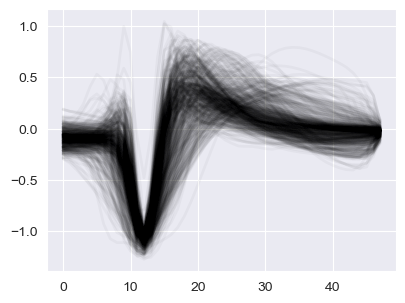

In [3]:
f, arr = plt.subplots(1,figsize=[4.5,3.4])

for i in range(0,unnormWFs.shape[0]):
    arr.plot(unnormWFs[i].T, c = 'k', alpha = 0.03,linewidth=2.)

#### Graph Realization of the Original Paper
In the code below, we use the processed data above to reproduce the graph from Lee et al.. We see that in the UMAP space, Louvain clustering identifies different clusters with significant success. Furthermore, we demonstrated the average waveform at each point in the UMAP space showing how UMAP maps to different waveforms.

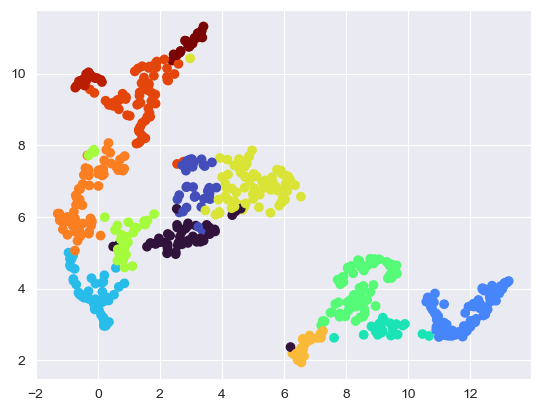

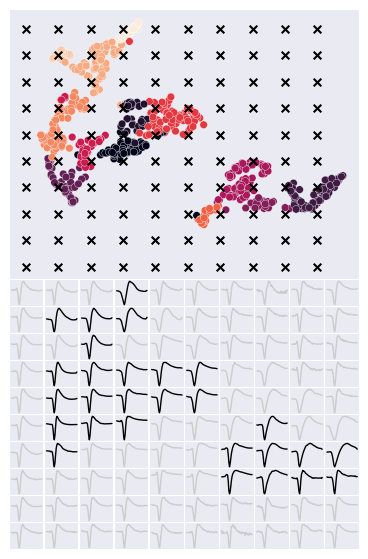

In [4]:
# pre-processing
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution

# visualization
f,arr = plt.subplots(1);
arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o',
            c=umap_df['cluster_id'].tolist(),cmap='turbo')

corners = np.array([
    [-2, 11],  # top-left
    [12, 11],  # top-right
    [-2, 0],  # bottom-left
    [12, 0],  # bottom-right
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)])

# reconstruct a waveform from the 2-d coordinate
inv_transformed_points = reducer.inverse_transform(test_pts)

def is_valid_color(color):
    if isinstance(color, str):
        return True
    if isinstance(color, tuple) and len(color) in {3, 4}:
        return all(0 <= c <= 1 for c in color)
    return False

def find_nearest_color(embedding, test_coord, threshold_dist=0.5):
    x_array, y_array = embedding[:, 0], embedding[:, 1]

    dist_array = np.abs(x_array - test_coord[0]) + np.abs(y_array -
                                                          test_coord[1])
    idx = dist_array.argmin()

    if dist_array[idx] <= threshold_dist:
        color = clustering_solution[idx]
    else:
        color = (0.8, 0.8, 0.8)

    if not is_valid_color(color):
        color = 'black'
    return color

fig = plt.figure(figsize=(4.5,7))
gs = GridSpec(20, 10, fig)
gs.update(wspace=0.05, hspace=0.05)
scatter_ax = fig.add_subplot(gs[:10, :10])
waveform_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        waveform_axes[i, j] = fig.add_subplot(gs[10+ i,j])

scatter_ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],
                   c=umap_df['cluster_id'], s=30,linewidth=0.25,
                   edgecolor='white',zorder=1)
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x',
                   c='k',
                   s=30, zorder=2, alpha=1)

# Plot each of the generated waveforms
for i in range(10):
    for j in range(10):
        waveform_axes[i, j].plot(inv_transformed_points[i*10 + j],
                                 c = find_nearest_color(reducer.embedding_,
                                                        test_pts[i*10 + j]),
                                 linewidth=1.0) # plot reconstructed waveform

        waveform_axes[i, j].set(xticks=[], yticks=[])
        waveform_axes[i, j].spines['right'].set_visible(False)
        waveform_axes[i, j].spines['top'].set_visible(False)
        waveform_axes[i, j].spines['left'].set_visible(False)
        waveform_axes[i, j].spines['bottom'].set_visible(False)

scatter_ax.set(xticks=[], yticks=[])
scatter_ax.spines['right'].set_visible(False)
scatter_ax.spines['top'].set_visible(False)
scatter_ax.spines['left'].set_visible(False)
scatter_ax.spines['bottom'].set_visible(False)

#### Comparison with the PCA
Since this is a new dimensionality, we want to examine the improvement of UMAP compared to the PCA we learned in class. The PCA methods are directly adapted from assignment 4 and in-class lectures.

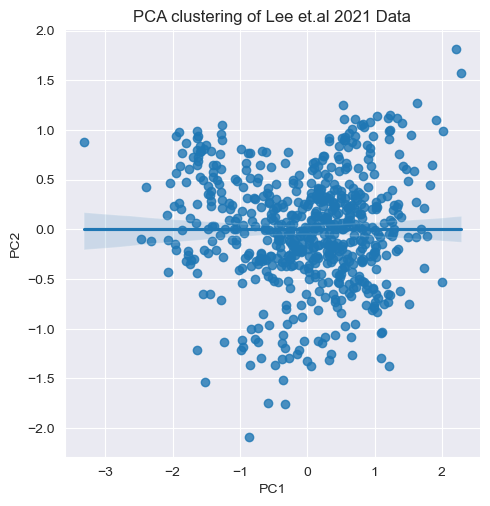

In [5]:
pca = PCA()
Nwave_df = pd.DataFrame(normWFs) # normalized waveform dataframe, each column is time
Nwave_2D = pca.fit_transform(Nwave_df)
PC1 = []
PC2 = []
for i in range(Nwave_df.shape[0]):
    PC1.append(Nwave_2D[i,0])
    PC2.append(Nwave_2D[i,1])

Nwave_df['PC1'] = pd.Series(data=PC1,index=Nwave_df.index)
Nwave_df['PC2'] = pd.Series(data=PC2,index=Nwave_df.index)
sns.lmplot(data=Nwave_df,x='PC1',y='PC2') #PCA analysis
plt.title('PCA clustering of Lee et.al 2021 Data')
plt.show()

  File "C:\Users\jlama\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jlama\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jlama\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jlama\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


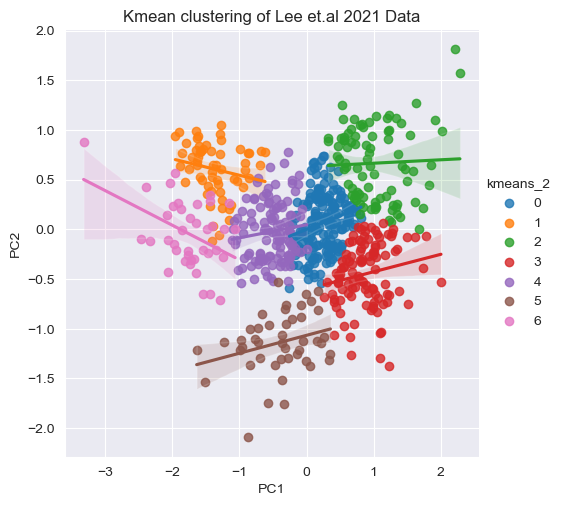

In [6]:
kmeans=KMeans(n_clusters=7)
kmeans=kmeans.fit(Nwave_2D)
kmeans_2=kmeans.labels_

Nwave_df['kmeans_2']=pd.Series(data=kmeans_2,index=Nwave_df.index)
sns.lmplot(data=Nwave_df,x='PC1',y='PC2',hue='kmeans_2')
plt.title('Kmean clustering of Lee et.al 2021 Data')
plt.show() #kmean clustering adapted from assignment 4 and in class lecture notebook

Next, we want to compare how PCA and k-means clustering labels these cells differently from the new UMAP and Louvain Clustering. We compared the difference in labeling by creating a histogram where each graph represents a label from the UMAP and Louvain Clustering. Within each graph, the histogram represents the number of different label results from the PCA and K-mean clustering. For example, if the histogram only shows one bar, it means that this group's results from UMAP and Louvain clustering are completely captured and recognized by the PCA and k-means clustering. On the other hand, if it is an evenly distributed histogram, it suggests that k-means clustering doesn't recognize this group at all. (Note that the number of clusters is chosen to be 7 for best results)

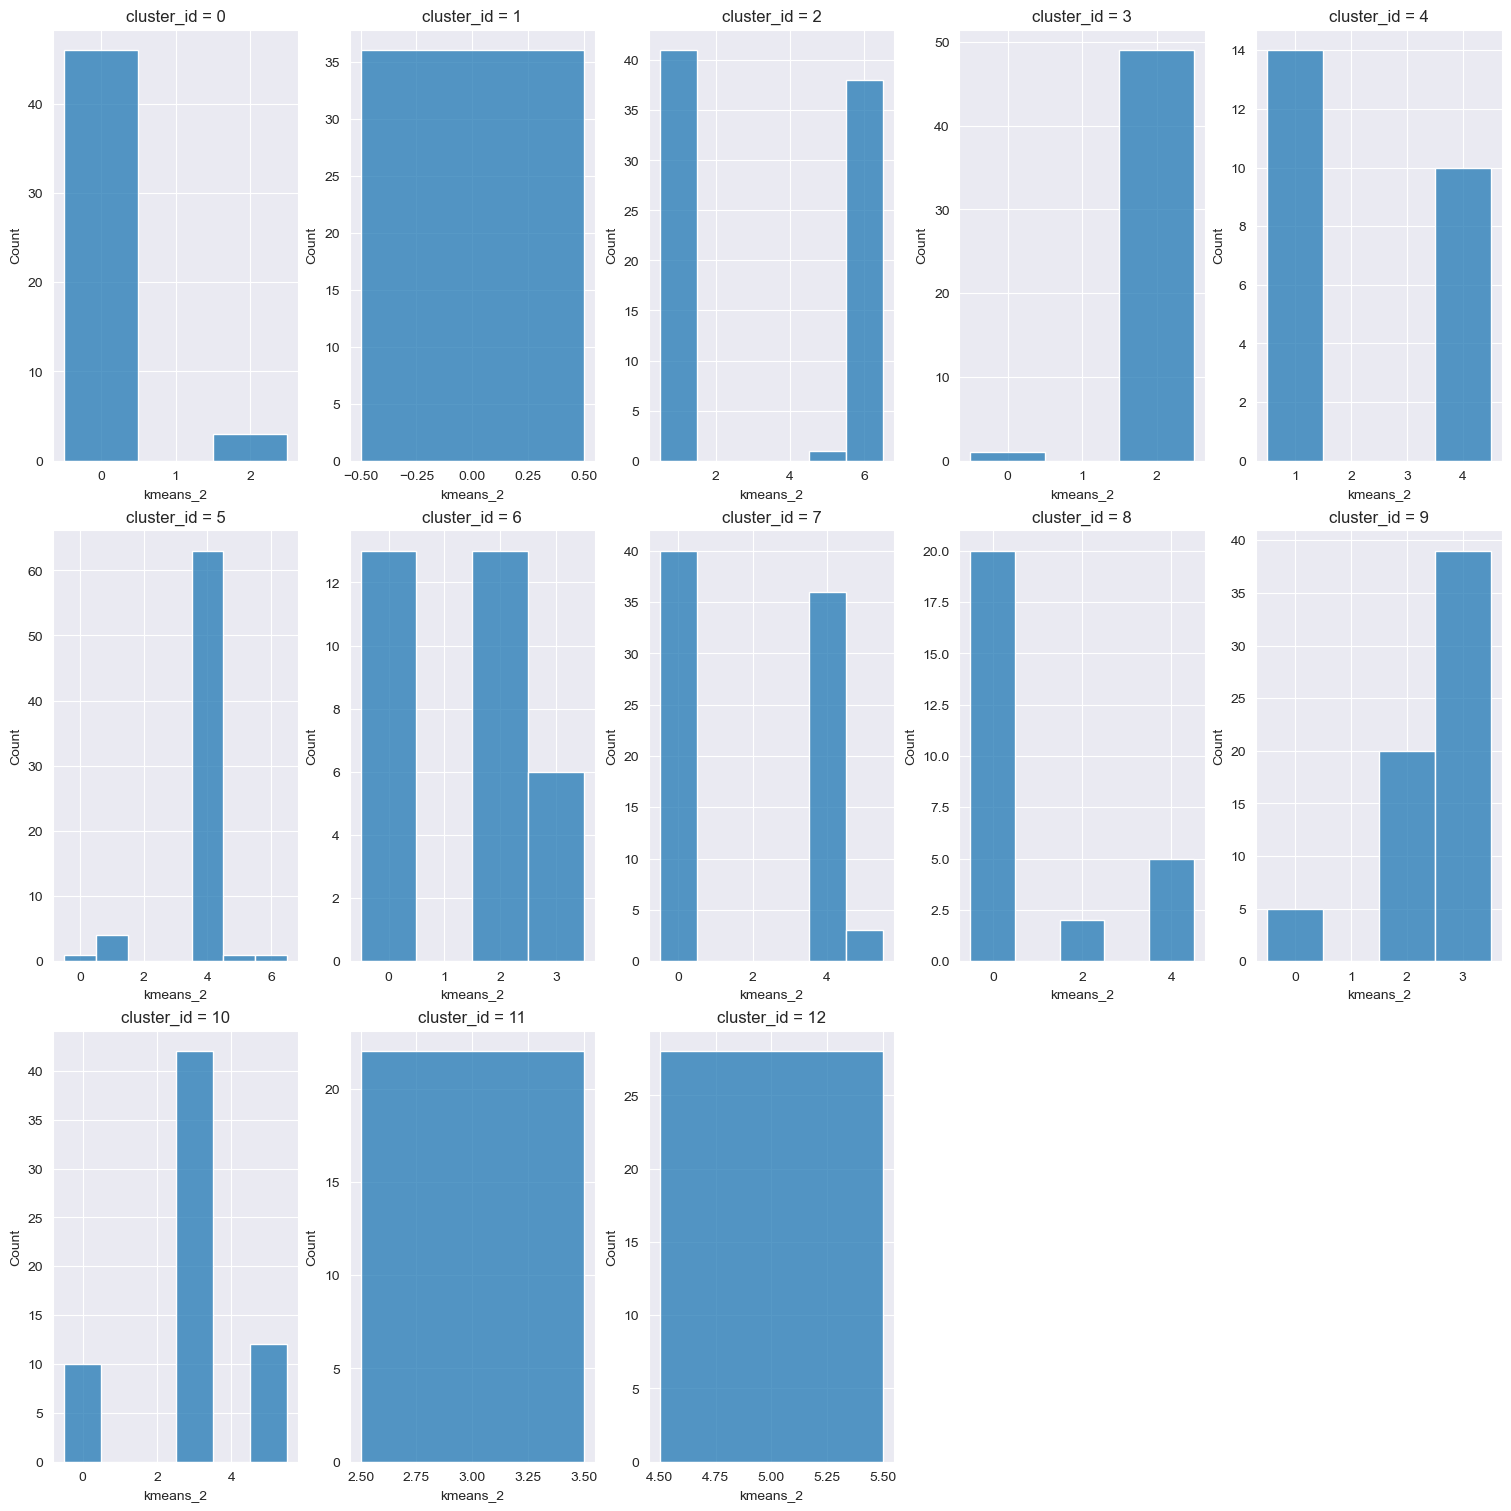

In [7]:
def label_comparison(dataf, label1, label2):
    label1_uni = dataf[label1].unique()

    n = len(label1_uni)
    cols = 5
    rows = (n // cols) + (n % cols > 0)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)
    axes = axes.flatten()

    for ax, label in zip(axes, label1_uni):
        temp = dataf[dataf[label1] == label]
        temp_list = temp[label2].tolist()
        sns.histplot(temp_list, discrete=True, ax=ax)
        ax.set_title(f'{label1} = {label}')
        ax.set_xlabel(label2)
        ax.set_ylabel('Count')

    for ax in axes[len(label1_uni):]:
        ax.axis('off')

    plt.show()

umap_df['kmeans_2'] = Nwave_df['kmeans_2']
label_comparison(umap_df, 'cluster_id', 'kmeans_2')

We then visualize the result of labeling differences by plotting the data in UMAP space with different labeling. As we can see in the data provided by the Lee et al., 2021, PCA and k-means clustering perform similarly to the UMAP and Louvain Clustering methods.

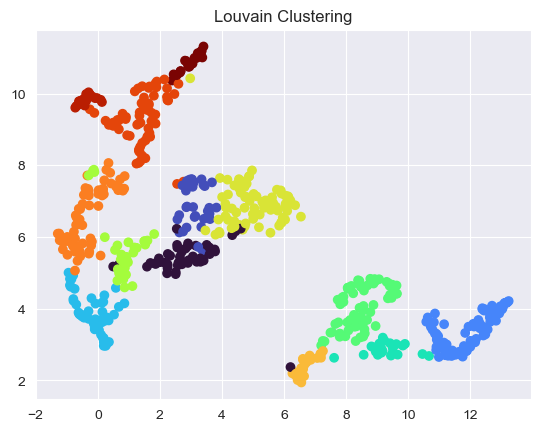

In [8]:
plt.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o',
            c=umap_df['cluster_id'].tolist(),cmap='turbo')
plt.title('Louvain Clustering')
plt.show()

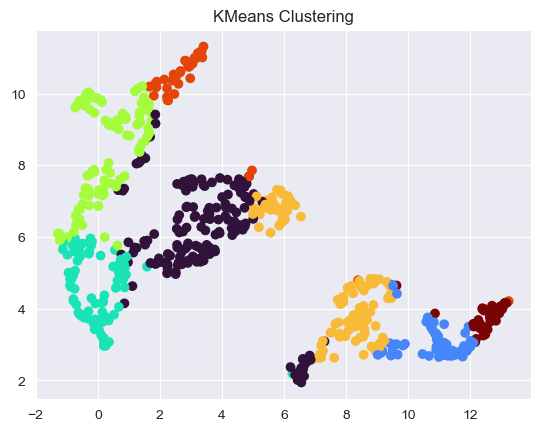

In [9]:
plt.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o',
            c=umap_df['kmeans_2'].tolist(),cmap='turbo')
plt.title('KMeans Clustering')
plt.show()

#### Cortical Activity in Anesthetized Rats Dataset

Data Wrangling
- File contains all isolated waveforms from the study and organized into a table format
- Waveforms already filtered and averaged (prerequisite of original implementation) and then normalized via sklearn's method
- Data reshaped to gather every channel's signal individually

Computational Restrictions
- Dataset comprised of ~900,000 waveforms
- Script is developed to handle this amount of data points but our system is not capable of producing results on this large of a dataset
- Have previously run on ~100,000 waveforms but for the purposes of interoperability, we restricted to only the first 10 recordings (1,280 waveforms)

Analysis purpose:

- the waveform is more diversed than the original dataset
- Can UMAP correctly identify different group?
- Can UMAP signficantly outperformed PCA?

Notes on the data:
It is important to note that the laminar location of units and recording sites, though relatively reliable, may have some uncertainty, especially near borders of layers or in superficial layers due to brain dimpling. These quality metrics and laminar localization details are crucial for assessing and understanding the dataset's reliability and neural activity characteristics.

In [10]:
io = NWBHDF5IO('data/allSingleUnits.nwb', 'r')
nwbfile = io.read()
nwbfile.units

units pynwb.misc.Units at 0x1887985582480
Fields:
  colnames: ['spike_times' 'cluster_id' 'session_id' 'mean_waveform_all_channels_filt'
 'mean_waveform_all_channels_raw' 'waveform_sd_all_channels_filt'
 'waveform_sd_all_channels_raw' 'mean_waveform_all_channels_filt_32x4'
 'mean_waveform_all_channels_raw_32x4' 'mean_waveform_peak_channel_filt'
 'mean_waveform_peak_channel_raw' 'trough_to_peak_amplitude'
 'peak_waveform_channel' 'trough_to_peak_time' 'ab_ratio'
 'waveform_spread_1D_relative' 'waveform_spread_1D_absolute'
 'waveform_spread_2D_relative' 'waveform_spread_2D_absolute'
 'cortical_layer' 'positive_spike' 'burst_index' 'spike_count'
 'firing_rate' 'presence_ratio' 'isi_violations' 'amplitude_cutoff' 'snr'
 'max_drift' 'cumulative_drift' 'isolation_distance' 'l_ratio'
 'nn_hit_rate' 'nn_miss_rate' 'd_prime']
  columns: (
    spike_times_index <class 'hdmf.common.table.VectorIndex'>,
    spike_times <class 'hdmf.common.table.VectorData'>,
    cluster_id <class 'hdmf.common.table.VectorData'>,
    session_id <class 'hdmf.common.table.VectorData'>,
    mean_waveform_all_channels_filt <class 'hdmf.common.table.VectorData'>,
    mean_waveform_all_channels_raw <class 'hdmf.common.table.VectorData'>,
    waveform_sd_all_channels_filt <class 'hdmf.common.table.VectorData'>,
    waveform_sd_all_channels_raw <class 'hdmf.common.table.VectorData'>,
    mean_waveform_all_channels_filt_32x4 <class 'hdmf.common.table.VectorData'>,
    mean_waveform_all_channels_raw_32x4 <class 'hdmf.common.table.VectorData'>,
    mean_waveform_peak_channel_filt <class 'hdmf.common.table.VectorData'>,
    mean_waveform_peak_channel_raw <class 'hdmf.common.table.VectorData'>,
    trough_to_peak_amplitude <class 'hdmf.common.table.VectorData'>,
    peak_waveform_channel <class 'hdmf.common.table.VectorData'>,
    trough_to_peak_time <class 'hdmf.common.table.VectorData'>,
    ab_ratio <class 'hdmf.common.table.VectorData'>,
    waveform_spread_1D_relative <class 'hdmf.common.table.VectorData'>,
    waveform_spread_1D_absolute <class 'hdmf.common.table.VectorData'>,
    waveform_spread_2D_relative <class 'hdmf.common.table.VectorData'>,
    waveform_spread_2D_absolute <class 'hdmf.common.table.VectorData'>,
    cortical_layer <class 'hdmf.common.table.VectorData'>,
    positive_spike <class 'hdmf.common.table.VectorData'>,
    burst_index <class 'hdmf.common.table.VectorData'>,
    spike_count <class 'hdmf.common.table.VectorData'>,
    firing_rate <class 'hdmf.common.table.VectorData'>,
    presence_ratio <class 'hdmf.common.table.VectorData'>,
    isi_violations <class 'hdmf.common.table.VectorData'>,
    amplitude_cutoff <class 'hdmf.common.table.VectorData'>,
    snr <class 'hdmf.common.table.VectorData'>,
    max_drift <class 'hdmf.common.table.VectorData'>,
    cumulative_drift <class 'hdmf.common.table.VectorData'>,
    isolation_distance <class 'hdmf.common.table.VectorData'>,
    l_ratio <class 'hdmf.common.table.VectorData'>,
    nn_hit_rate <class 'hdmf.common.table.VectorData'>,
    nn_miss_rate <class 'hdmf.common.table.VectorData'>,
    d_prime <class 'hdmf.common.table.VectorData'>
  )
  description: units table
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  waveform_unit: volts

In [11]:
# pre-processing
waveforms = nwbfile.units['mean_waveform_all_channels_filt'].data[:]
# first 10 recordings, change by multiples of 128 for each recording
waveforms = np.transpose(waveforms, (0, 2, 1)).reshape(-1, 81)[:1280]
print(waveforms.shape)
normWFs = sklearn.preprocessing.normalize(waveforms,norm='max')

# modeling
reducer = umap.UMAP()
mapper = reducer.fit(normWFs)
embedding = reducer.fit_transform(normWFs)

# graphing + clustering
G = nx.from_scipy_sparse_array(mapper.graph_)
clustering = cylouvain.best_partition(G, resolution=0.5)
clustering_solution = list(clustering.values())

(1280, 81)


#### A More Diversed Waveform as Shown Below

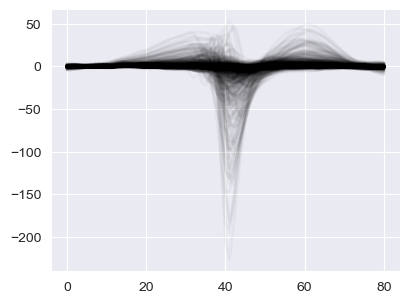

In [12]:
f, arr = plt.subplots(1,figsize=[4.5,3.4])

for i in range(0,waveforms.shape[0]):
    arr.plot(waveforms[i].T, c = 'k', alpha = 0.03,linewidth=2.)

We then generate the UMAP representation using exactly the same procedure. The results show that UMAP is capable of generating discrete waveform discretion in two dimensional space.

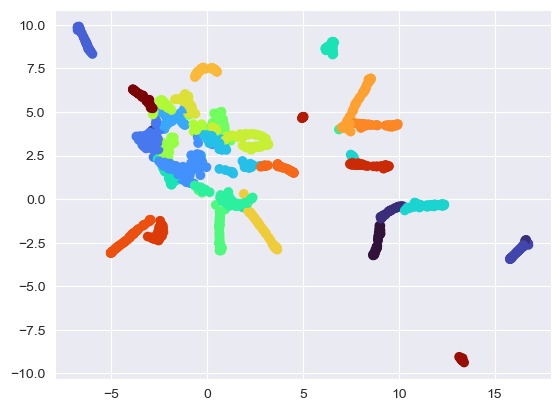

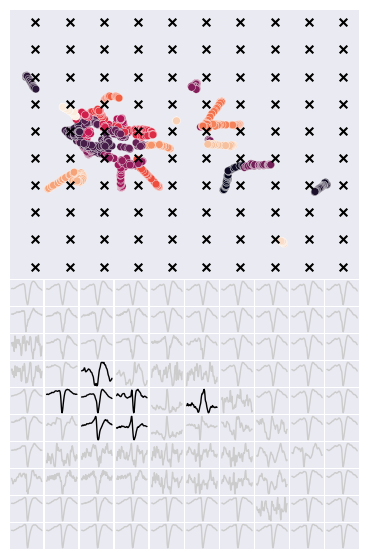

In [13]:
# pre-processing
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution

# visualization
f,arr = plt.subplots(1);
arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o',
            c=umap_df['cluster_id'].tolist(),cmap='turbo')

corners = np.array([
    [-6, 16],  # top-left
    [18, 16],  # top-right
    [-6, -12],  # bottom-left
    [18, -12],  # bottom-right
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)])

# reconstruct a waveform from the 2-d coordinate
inv_transformed_points = reducer.inverse_transform(test_pts)

fig = plt.figure(figsize=(4.5,7))
gs = GridSpec(20, 10, fig)
gs.update(wspace=0.05, hspace=0.05)
scatter_ax = fig.add_subplot(gs[:10, :10])
waveform_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        waveform_axes[i, j] = fig.add_subplot(gs[10+ i,j])

scatter_ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],
                   c=umap_df['cluster_id'], s=30,linewidth=0.25,
                   edgecolor='white',zorder=1)
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x',
                   c='k',
                   s=30, zorder=2, alpha=1)

# Plot each of the generated waveforms
for i in range(10):
    for j in range(10):
        waveform_axes[i, j].plot(inv_transformed_points[i*10 + j],
                                 c = find_nearest_color(reducer.embedding_,
                                                        test_pts[i*10 + j]),
                                 linewidth=1.0)

        waveform_axes[i, j].set(xticks=[], yticks=[])
        waveform_axes[i, j].spines['right'].set_visible(False)
        waveform_axes[i, j].spines['top'].set_visible(False)
        waveform_axes[i, j].spines['left'].set_visible(False)
        waveform_axes[i, j].spines['bottom'].set_visible(False)

scatter_ax.set(xticks=[], yticks=[])
scatter_ax.spines['right'].set_visible(False)
scatter_ax.spines['top'].set_visible(False)
scatter_ax.spines['left'].set_visible(False)
scatter_ax.spines['bottom'].set_visible(False)

We further examine the waveform at each cluster by plotting their average waveform

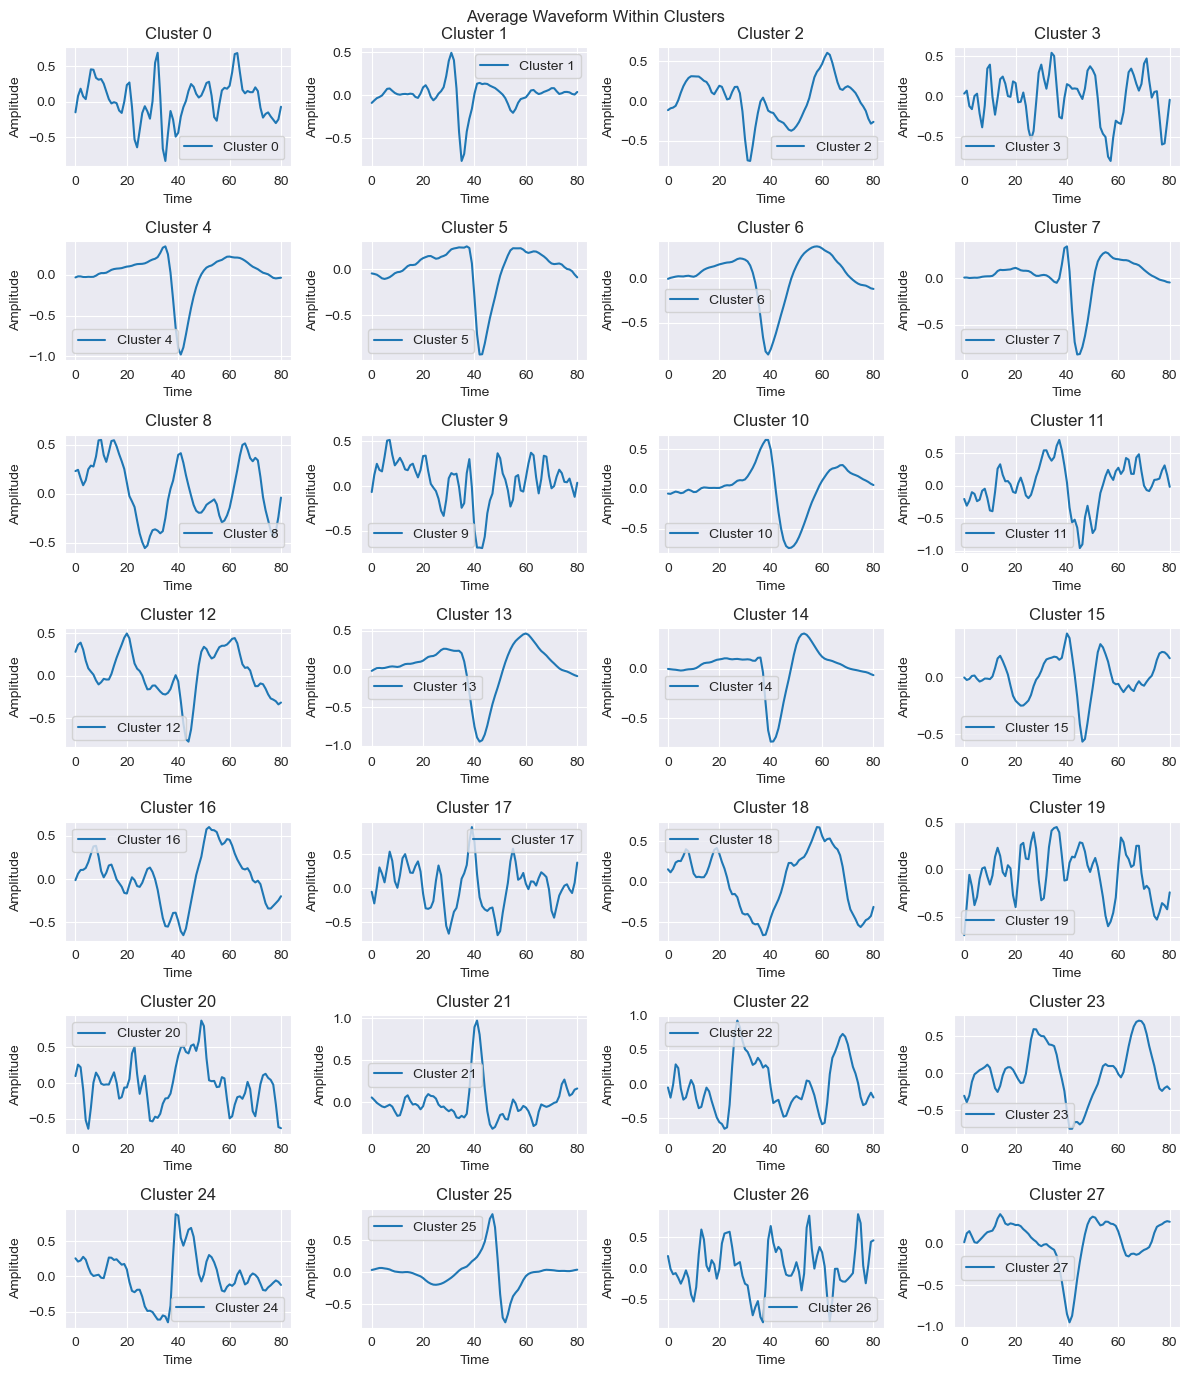

In [14]:
# pre-processing
mean_wf = umap_df.groupby('cluster_id')['waveform'].mean()
mean_wf_dict = mean_wf.to_dict()

num_cols = 4
num_rows = (len(mean_wf_dict) + num_cols - 1) // num_cols

# visualization
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows))
fig.suptitle('Average Waveform Within Clusters')
axes = axes.flatten()

for idx, (label, avg_waveform) in enumerate(mean_wf_dict.items()):
    ax = axes[idx]
    ax.plot(avg_waveform, label=f'Cluster {label}')
    ax.set_title(f'Cluster {label}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.legend()

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Computing the value of each cluster

In [15]:
# pre-processing
mean_wf = umap_df.groupby('cluster_id')['waveform'].mean()
mean_wf_dict = mean_wf.to_dict()

# standard deviation calculation
cluster_stds = {}
for cluster_id, group in umap_df.groupby('cluster_id'):
    waveforms = np.stack(group['waveform'].values) # matrix of waveforms
    variance = np.var(waveforms, axis=0).mean()  # average variance across the waveform
    cluster_stds[cluster_id] = np.sqrt(variance) # compute standard deviation

cluster_stds = dict(sorted(cluster_stds.items(), key=lambda item: item[1]))

for key, value in cluster_stds.items():
    if value < 0.16:
        print('Cluster ' + str(key) + ' Standard Deviation: ' + str(round(value, 2)))

Cluster 4 Standard Deviation: 0.08
Cluster 25 Standard Deviation: 0.1
Cluster 13 Standard Deviation: 0.11
Cluster 26 Standard Deviation: 0.11
Cluster 24 Standard Deviation: 0.12
Cluster 21 Standard Deviation: 0.12
Cluster 5 Standard Deviation: 0.13
Cluster 14 Standard Deviation: 0.14
Cluster 11 Standard Deviation: 0.15
Cluster 27 Standard Deviation: 0.15
Cluster 6 Standard Deviation: 0.15
Cluster 7 Standard Deviation: 0.16


In [16]:
def calculate_snr(waveforms):
    signal_power = np.mean(np.square(np.mean(waveforms, axis=0))) # average of the squared averages of waveforms
    noise_power = np.mean(np.var(waveforms, axis=0)) # average variance across the waveform
    return signal_power / noise_power # signal to noise ratio

# SNR calculations
snr_dict = {}
for cluster_id, group in umap_df.groupby('cluster_id'):
    waveforms = np.stack(group['waveform'].values) # matrix of waveforms
    snr = calculate_snr(waveforms)
    snr_dict[cluster_id] = snr

snr_dict = dict(sorted(snr_dict.items(), key=lambda item: item[1], reverse=True))
for key, value in snr_dict.items():
    # gather only clusters with significant SNR power
    if value > 3:
        print('Cluster ' + str(key) + ' SNR: ' + str(round(value, 2)))

Cluster 26 SNR: 11.38
Cluster 4 SNR: 11.11
Cluster 13 SNR: 9.26
Cluster 24 SNR: 7.53
Cluster 25 SNR: 7.03
Cluster 11 SNR: 5.28
Cluster 22 SNR: 5.09
Cluster 5 SNR: 4.14
Cluster 21 SNR: 3.7
Cluster 23 SNR: 3.49
Cluster 6 SNR: 3.39
Cluster 27 SNR: 3.3
Cluster 0 SNR: 3.04


We are able to identify which clusters contain the highest quality waveforms by assessing the standard deviation found within the group as well as the average sound to noise ratio of the signals. Those that are at the top of these metrics are the most significant clusters as they contain the most identifiable waveforms on average and can more reliably define the signal's community.

#### Comparison with the PCA
We perform the PCA and k-means clustering as we did with the original data and obvserved the results.

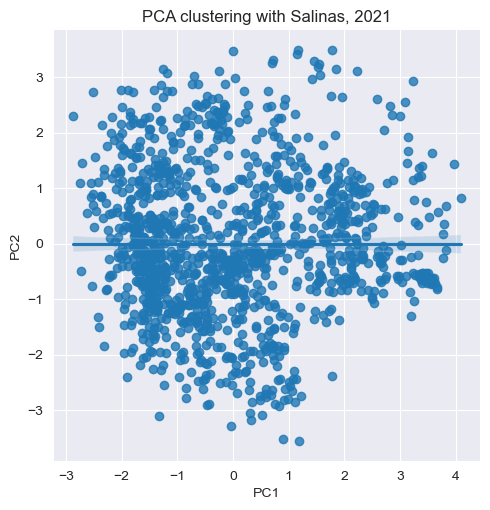

In [17]:
Nwave_df = pd.DataFrame(normWFs) # normalized waveform dataframe, each columns is time

pca = PCA()
Nwave_2D = pca.fit_transform(Nwave_df)
PC1 = []
PC2 = []
for i in range(Nwave_df.shape[0]):
    PC1.append(Nwave_2D[i,0])
    PC2.append(Nwave_2D[i,1])

Nwave_df['PC1'] = pd.Series(data=PC1,index=Nwave_df.index)
Nwave_df['PC2'] = pd.Series(data=PC2,index=Nwave_df.index)

sns.lmplot(data=Nwave_df,x='PC1',y='PC2') # PCA analysis
plt.title('PCA clustering with Salinas, 2021')
plt.show()

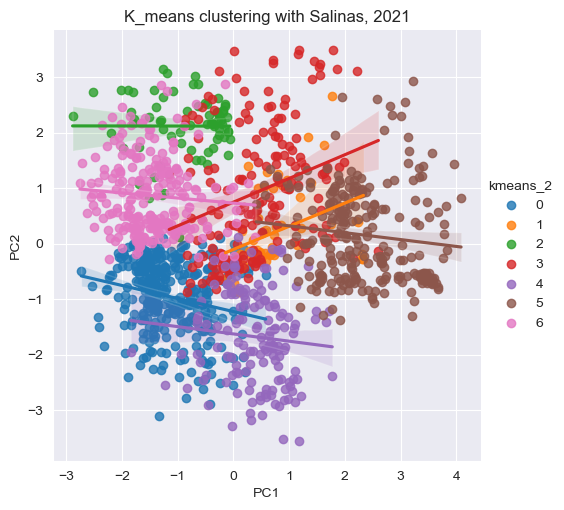

In [18]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(Nwave_2D)
kmeans_2 = kmeans.labels_

Nwave_df['kmeans_2'] = pd.Series(data=kmeans_2,index=Nwave_df.index)
sns.lmplot(data=Nwave_df,x='PC1',y='PC2',hue='kmeans_2') #kmeans
plt.title('K_means clustering with Salinas, 2021')
plt.show()

We can see that the PCA scatters much more than the previous dataset, and the data shown below suggest the PCA cannot capture the correct clustering correctly. Indicating that UMAP is a much better results.

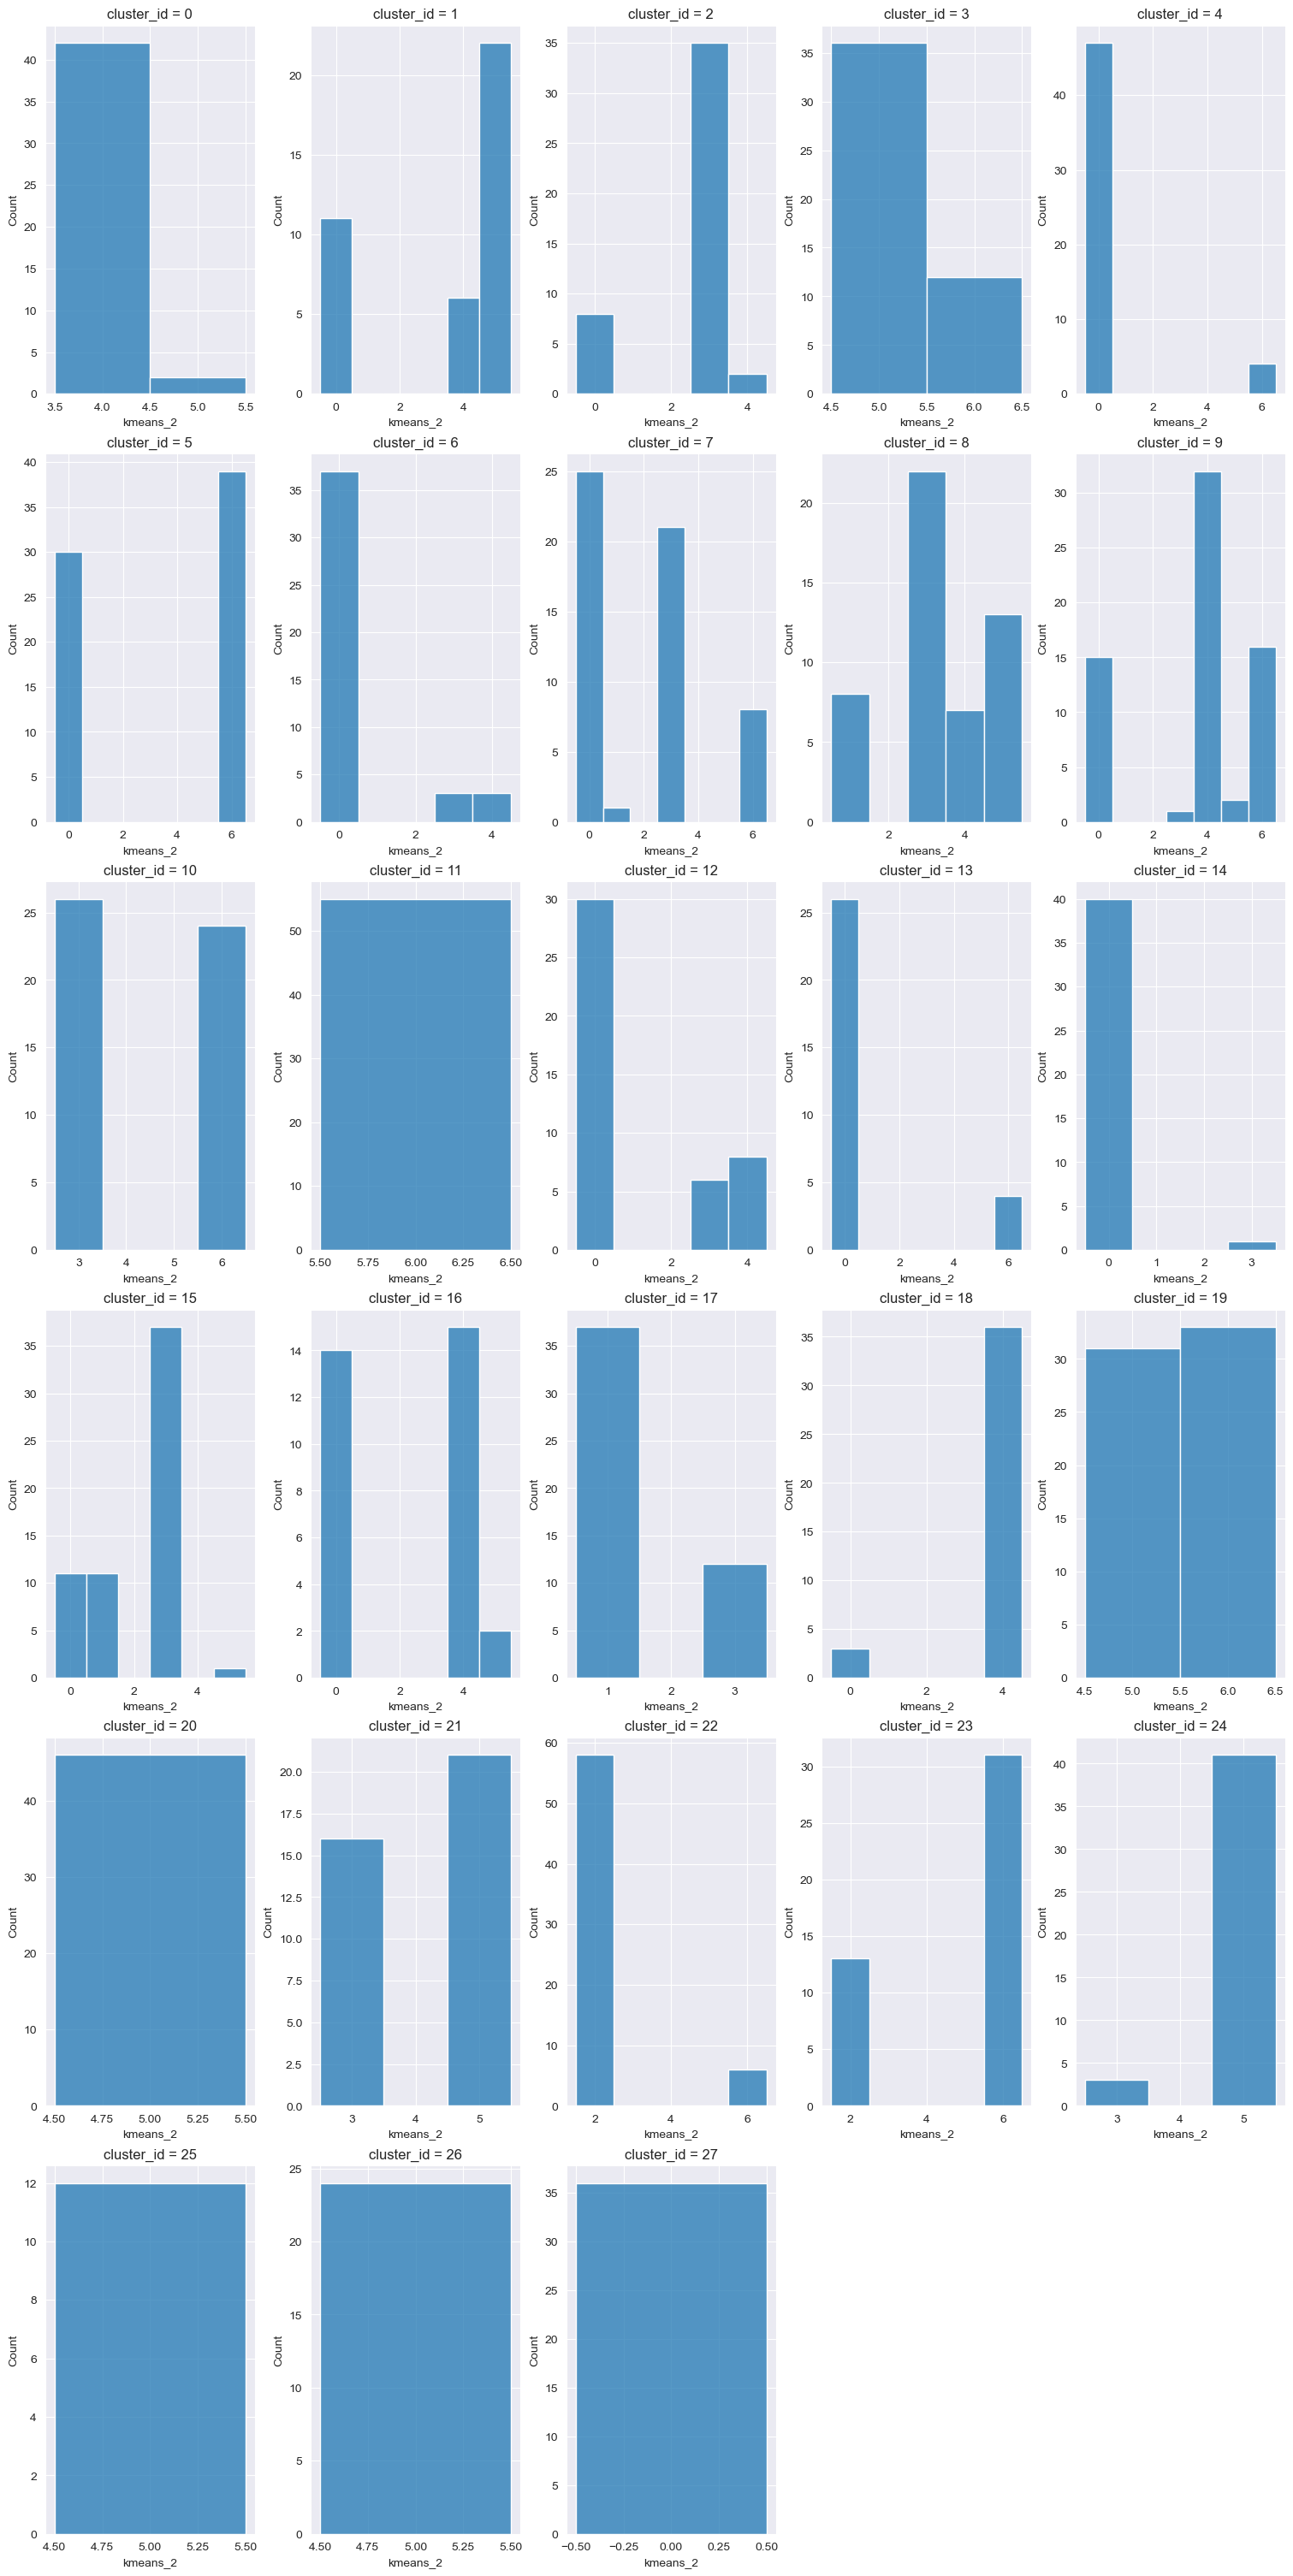

In [19]:
umap_df['kmeans_2'] = Nwave_df['kmeans_2']
label_comparison(umap_df,'cluster_id','kmeans_2')

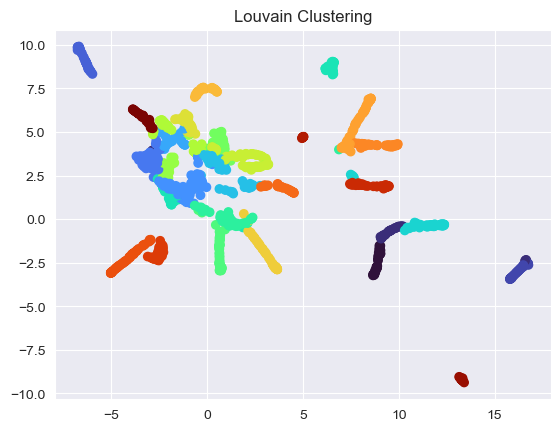

In [20]:
plt.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o',
            c=umap_df['cluster_id'].tolist(),cmap='turbo')
plt.title('Louvain Clustering')
plt.show()

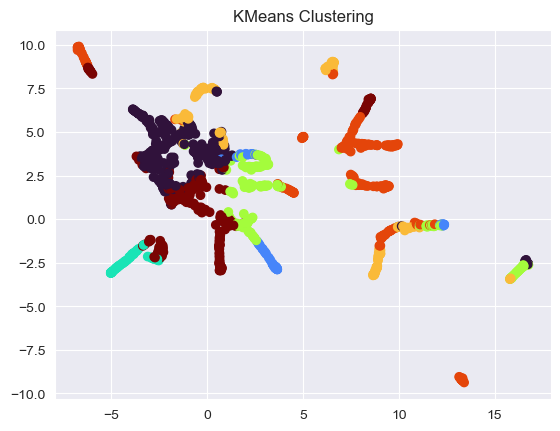

In [21]:
plt.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o',
            c=umap_df['kmeans_2'].tolist(),cmap='turbo')
plt.title('KMeans Clustering')
plt.show()

## Conclusion & Discussion

#### Discussion:
In the analysis of the original dataset from Lee et.al, 2021, we can see that UMAP and Louvain clustering successfully identify most of the clusters with little overlapping boundary. However, possibly due to the low variability in the data they recorded. Similar differentiating clusters can also be achieved by the PCA and K-means Clustering that we discussed in class. With no clear distinction between the two. However, UMAP and Louvain clustering significantly outperformed PCA and K-means clustering in the second dataset. This is demonstrated by the fact that K-means label results in a completely scrambled label when it is graphed in the UMAP space meaning that PCA and K-means failed to capture the high dimension relationship between the data. While on the other hand, UMAP and Louvain clustering clearly perform better by successful labeling of distinct waveforms. Therefore, these results suggest that based on the dataset we have, UMAP and Louvain clustering can successfully differentiate cells based on neurons extracellular waveforms only. While Principal Component Analysis perform much worse in the larger and more diverse datasets, this indicate that the UMAP and Louvain clustering methods have more power in complicated data.

#### Limitations
Limitation of our project are largely computational as well as issues presented within the dataset. With a large-scale dataset such as this, we would require tools outside of the basic data processing libraries such as PySpark which may be looked at for future work in addition to GPU utilization. Additionally, within this dataset are noisy signals not necessarily representative of some significant process but are still included. While this does result in a larger number of clusters and some not being representative of a single unique structure, it is mostly intentional as it is still useful to see how this model and algorithm handle non-uniform waveforms and decipher what is truly of significance if used in a live setting for example. Finally, although the dataset is large, the recording comes from the same lab. This means that there are still doubts about whether we can generalized this results to all neurons.

#### Future Experiment:
Because this Wave MAP method provides clustering solely based on the waveform of a single spike. The first and foremost questions will be is it possible to incorporate firing frequency in the analysis. Theoretically, firing frequency is just an extra dimension which in the Principal Component Analysis it is extremely simple to incorporate this extra dimension. And UMAP should be no difference, however, one of the major concerns is the relative weight of the firing frequency, as this variable can vary a lot across different neurons type. Firing frequency with a normalization factor that is too small might overwhelm the effect of the waveform. So, an experiment can be done to test a good normalization factor so we can include firing rate in our analysis. Furthermore, theoretically with Louvain clustering and UMAP, researchers can breakdown cell types to individual neurons. However, we should analyze both the genetics and the electrophysiology at the same time to decide where we draw the line of a good Louvain clustering.

### Reflections

Aakash:

Our project was to apply the WaveMAP dimensionality reduction method from a previous paper to a new dataset. The comments from the proposal highlighted a need for deeper understanding and clarity regarding WaveMAP's application and scope. We read through the paper to gain a better understanding of the principles behind WaveMAP, UMAP, and Louvain clustering. We had a few challenges when attempting to analyze the data using WaveMAP and adapting it to the new dataset. To fix the problems, we had to understand the nuances of UMAP and Louvain clustering, as well as how they play a part in WaveMAP dimensionality reduction. Another difficulty was ensuring that the preprocessing steps, like spike sorting, were meticulously handled to maintain data integrity and achieve comparable results. Once our code worked, it was rewarding to see the clusters form and the potential relationships and conclusions that could be drawn from the data.

Jacob:

The end product of this project was successful as we effectively reimplemented the WaveMAP model on a very large and diverse dataset which had not been originally performed and has allowed us to analyze the methods in respects to noisy and insignificant data which would appear to be a more practical application. The proposal and beginning of our project was difficult as datasets are difficult to find pre-sorted and properly labeled/structured, but we eventually gathered a suitable dataset which also exposed our computational restrictions. Due to restrictions in memory and system storage, downloading, uploading, and loading data into our repositories was challenging in addition to establishing all the proper dependencies which was massively difficult. However, in overcoming these obstacles, I am happy to have gained further experience in neural signal processing efforts and the implementations of unsupervised learning.

Ziyuan Shu:

The feedback from the proposal is extremely helpful in pointing out that the data they are using is raw data instead of the properties data.  Because this remind us earlier to find other datasets and it turns out that finding times series of extracellular recording can be extremely difficult. Despite the fact that the experiment is being done continuously throughout the world, the data in general is much less organized. The difficulty is first finding the data and understanding the algorithms. But it is also rewarding that understanding the mechanisms, that I am thoroughly impressed with the methods that scientists have came up with. And it went better than the cell type project I think.

### Reference:
Primary Dataset and experimental methods:

Lee, Eric Kenji et al. “Non-linear dimensionality reduction on extracellular waveforms reveals cell type diversity in premotor cortex.” eLife vol. 10 e67490. 6 Aug. 2021, doi:10.7554/eLife.67490

Secondary Dataset:

Horváth, Csaba et al. “Dataset of cortical activity recorded with high spatial resolution from anesthetized rats.” Scientific data vol. 8,1 180. 15 Jul. 2021, doi:10.1038/s41597-021-00970-3

Undiscussed Library:

“How Umap Works.” How UMAP Works - Umap 0.5 Documentation, umap-learn.readthedocs.io/en/latest/how_umap_works.html. Accessed 10 June 2024.

cylouvain: perform louvain clustering following Lee et al., 2021:
https://github.com/ahollocou/cylouvain